In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import calendar
from datetime import datetime

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
BikeData = pd.read_csv("bike.csv")
BikeData.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# see how large is the data 
BikeData.shape

(10886, 12)

In [4]:
# check missing values 
BikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


# Feature Engineering 

In [5]:
# split the 1st datetime to year + time 
ex = BikeData.datetime[1]
ex.split()

['2011-01-01', '01:00:00']

In [6]:
ex.split()[0]

'2011-01-01'

In [7]:
ex.split()[1]

'01:00:00'

In [8]:
# split the time into hour,min and second
ex.split()[1].split(":")

['01', '00', '00']

In [9]:
def get_date(x):
    return(x.split()[0])

def get_hour(x):
    return(x.split()[1].split(":")[0])

# add date and hour columns
BikeData["date"] = BikeData.datetime.apply(get_date)
BikeData["hour"] = BikeData.datetime.apply(get_hour)

BikeData.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04


In [10]:
# import seven days from calendar
calendar.day_name[:]

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [11]:
# get datetime of date string 
dateString = ex.split()[0]

# use strptime to transfter string to type of datetime
dateDT = datetime.strptime(dateString,"%Y-%m-%d")
week_day = dateDT.weekday()
week_day
calendar.day_name[week_day]

'Saturday'

In [12]:
def get_weekday(dateString):
    week_day = datetime.strptime(dateString,"%Y-%m-%d").weekday()
    return(calendar.day_name[week_day])

# add weekday column 
BikeData["weekday"] = BikeData.date.apply(get_weekday)

BikeData.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04,Saturday


# Visualization

[Text(0.5, 0, 'Hour'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Hours')]

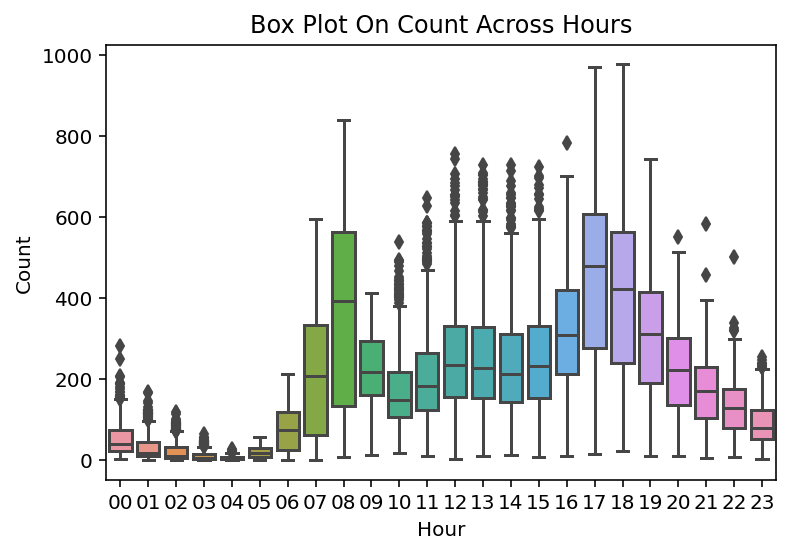

In [13]:
# draw boxplot
ax = sns.boxplot(data=BikeData, y="count", x="hour")
ax.set(xlabel='Hour', ylabel='Count',title="Box Plot On Count Across Hours")
#sns.set(rc = {'figure.figsize':(16,4)})

# Correlation Analysis

In [14]:
correlation = BikeData[["casual","registered","temp","atemp","humidity","windspeed","count"]].corr()
correlation

,casual,registered,temp,atemp,humidity,windspeed,count
casual,1.000000,0.497250,0.467097,0.462067,-0.348187,0.092276,0.690414
registered,0.497250,1.000000,0.318571,0.314635,-0.265458,0.091052,0.970948
temp,0.467097,0.318571,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.462067,0.314635,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.348187,-0.265458,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,0.092276,0.091052,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.690414,0.970948,0.394454,0.389784,-0.317371,0.101369,1.000000


<AxesSubplot:>

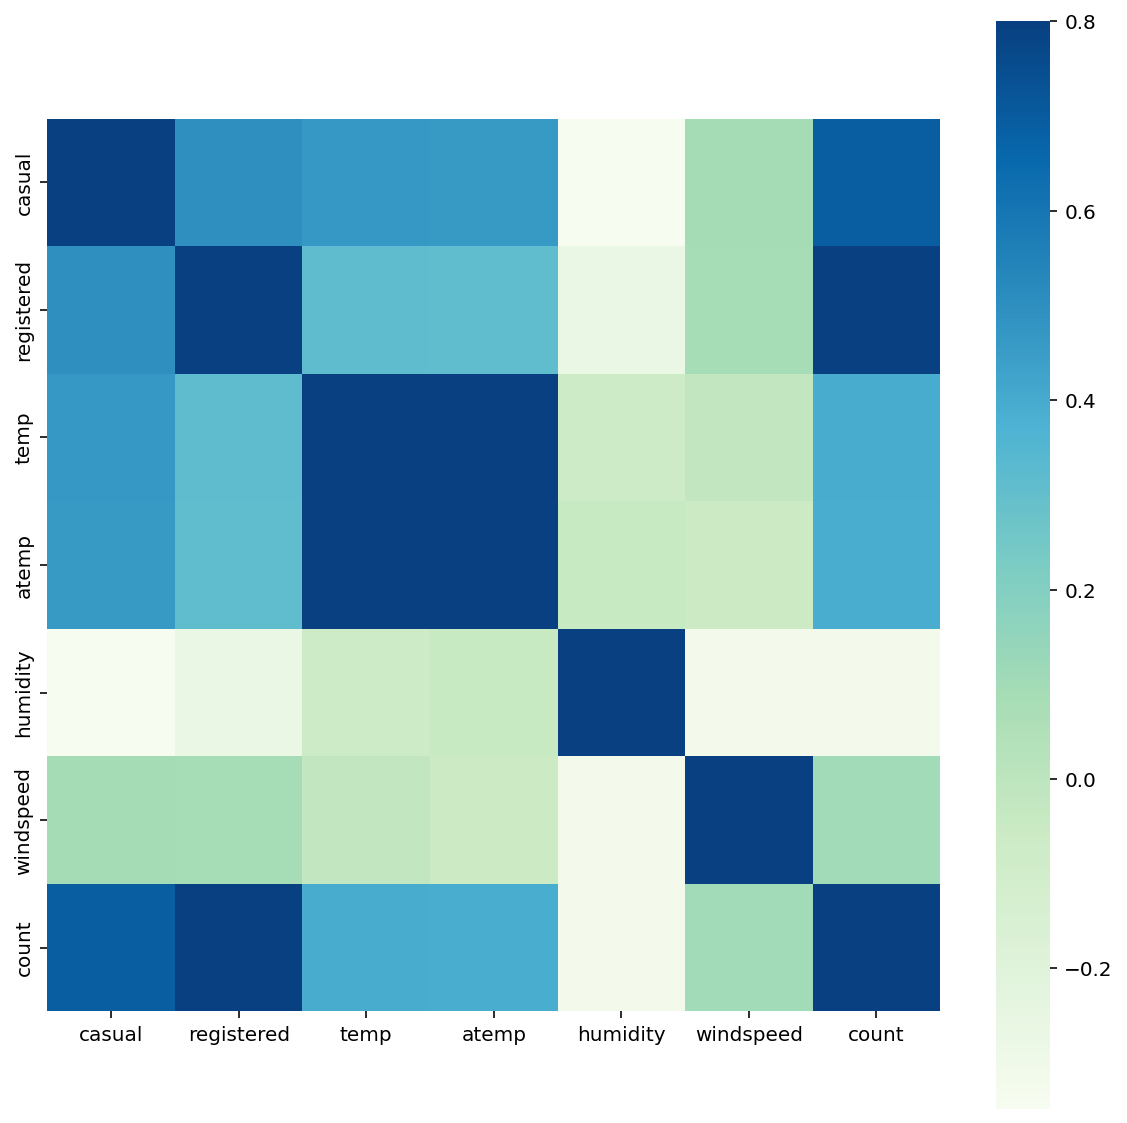

In [15]:
# heatmap
fig = plt.figure(figsize = (10, 10))
sns.heatmap(correlation, vmax=.8, square=True,cmap = 'GnBu')

<AxesSubplot:xlabel='temp', ylabel='atemp'>

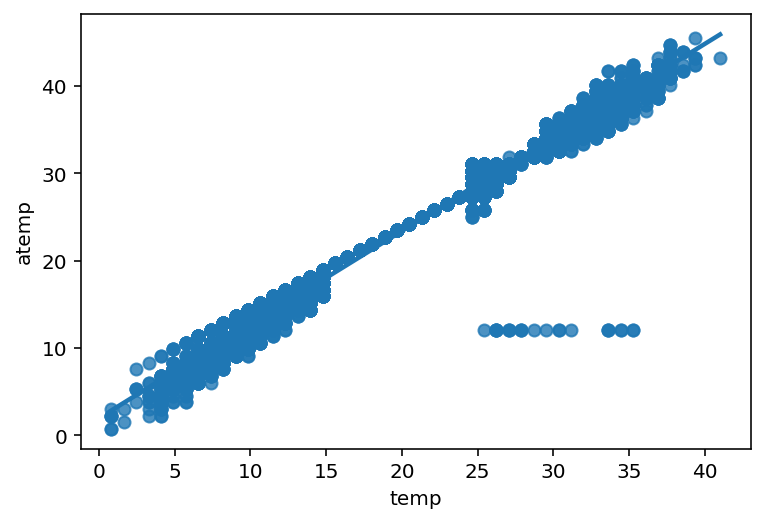

In [16]:
# draw regression plot
sns.regplot(x="temp", y="atemp", data=BikeData)

# Under what temperature and humidity conditions are the most people renting a bike?

/Users/zhijiewei/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/zhijiewei/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/zhijiewei/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:675: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


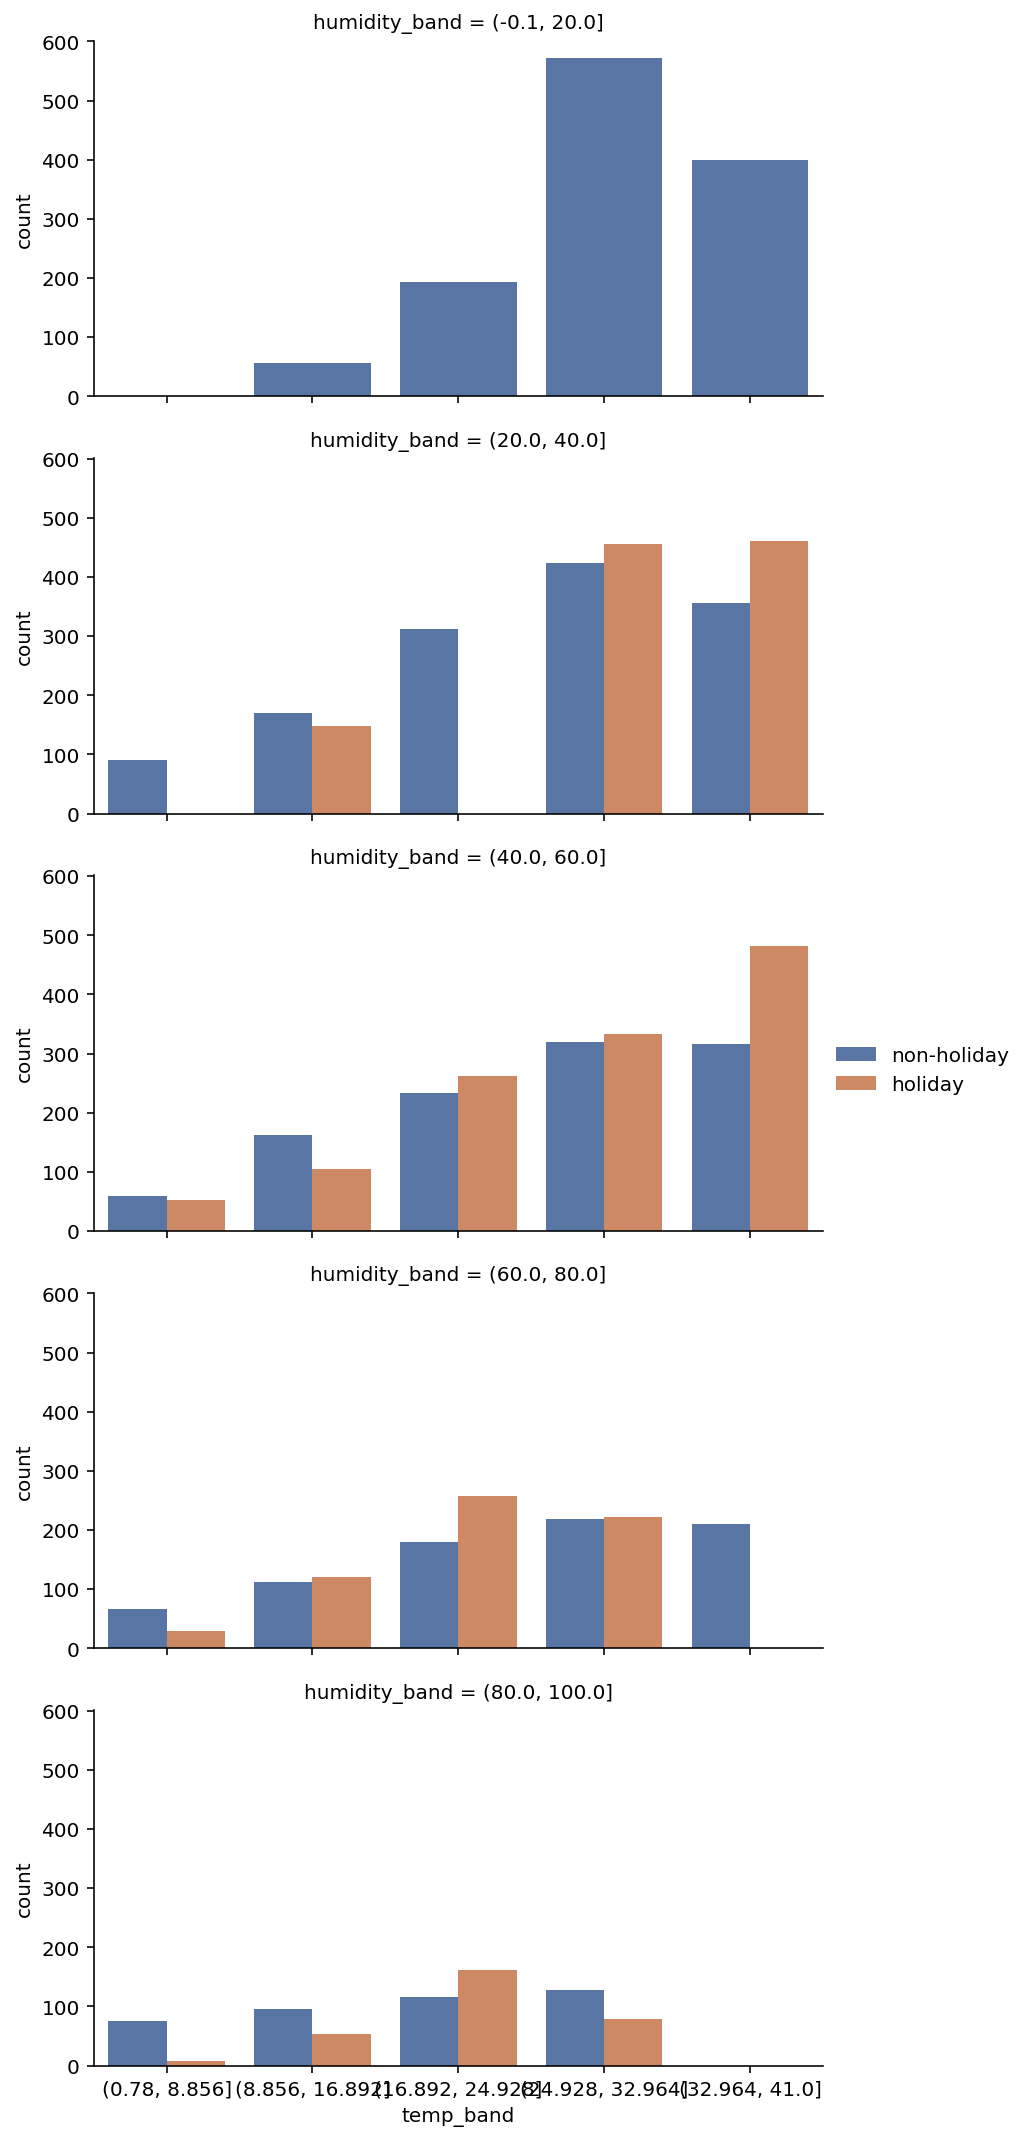

In [17]:
# use pd.cut() to split temperature and humidity
BikeData['humidity_band'] = pd.cut(BikeData['humidity'], 5)
BikeData['temp_band'] = pd.cut(BikeData['temp'], 5)

# use map(), 0='non-holiday', 1='holiday'
BikeData['holiday_cat'] = BikeData['holiday'].map( {0: 'non-holiday', 1: 'holiday'} )

# draw with facetGrid 
sns.FacetGrid(data = BikeData, row='humidity_band', size=3, aspect=2).\
    map(sns.barplot, 'temp_band', 'count',  'holiday_cat', palette='deep', ci=None).\
    add_legend()

In [18]:
# use map() to relate numbers with seasons 
BikeData["season_label"] = BikeData.season.map({1:"spring",2: "summer",3:"fall",4:"winter"})

/Users/zhijiewei/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/zhijiewei/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/zhijiewei/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


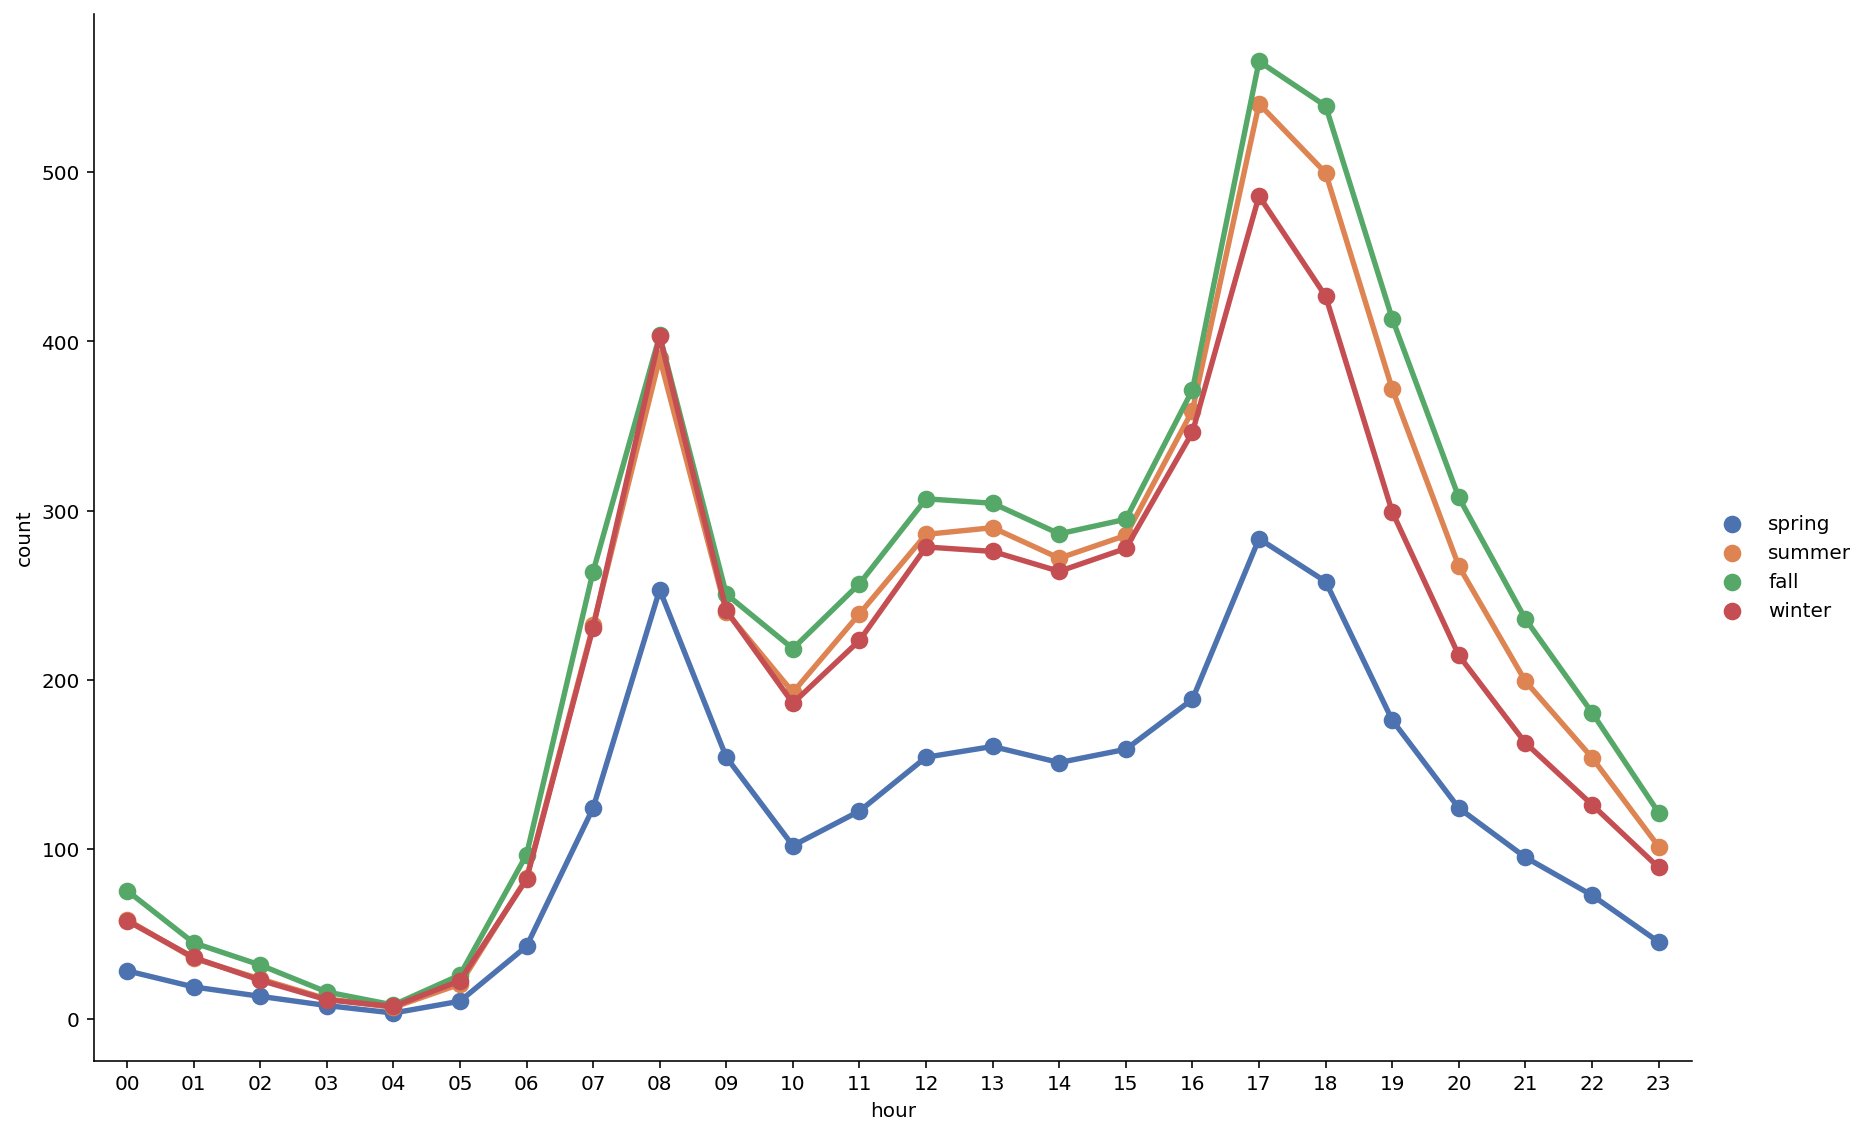

In [19]:
sns.FacetGrid(data = BikeData, size=8, aspect=1.5).\
    map(sns.pointplot, 'hour', 'count','season_label', palette='deep', ci=None).\
    add_legend()

In [20]:
def get_month(dateString):
    return(datetime.strptime(dateString,"%Y-%m-%d").month)

BikeData["month"] = BikeData.date.apply(get_month)

/Users/zhijiewei/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/zhijiewei/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/zhijiewei/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


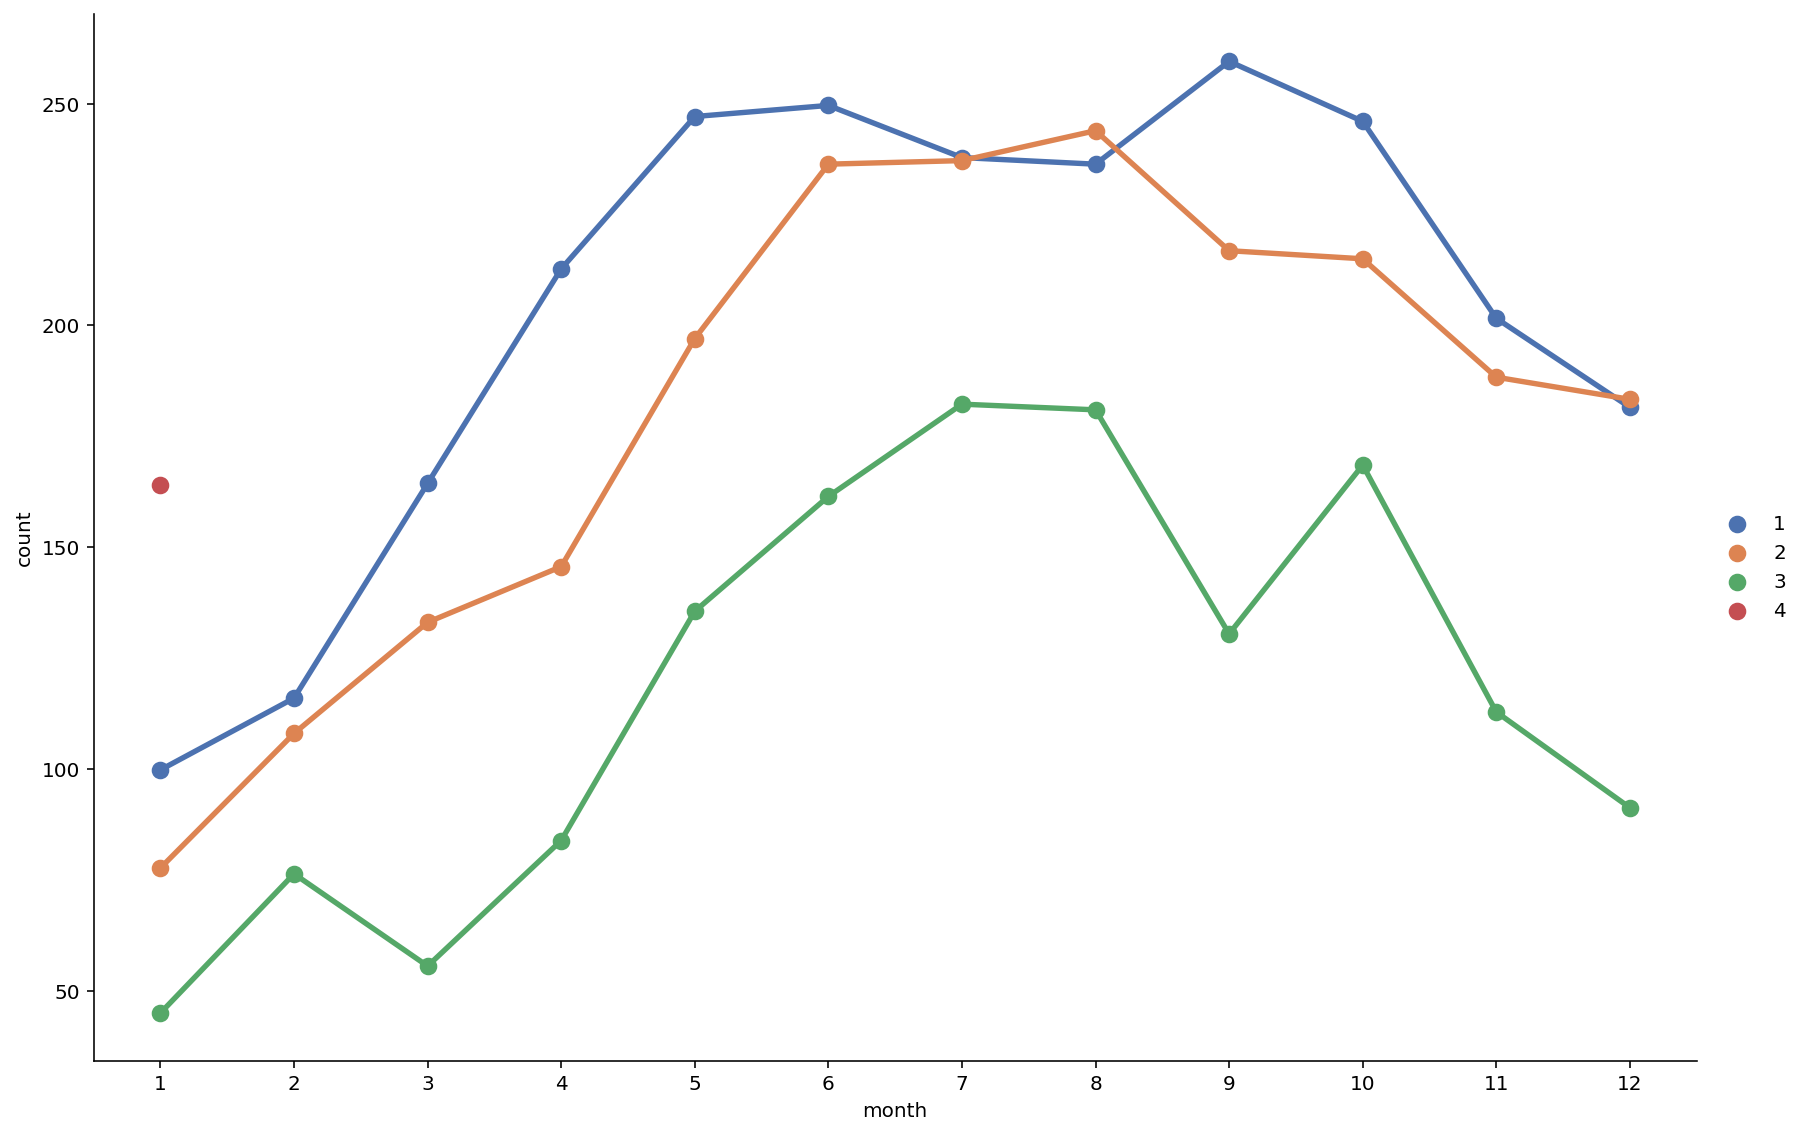

In [21]:
sns.FacetGrid(data = BikeData, size=8, aspect=1.5).\
    map(sns.pointplot, 'month', 'count','weather', palette='deep', ci=None).\
    add_legend()

# Conclusion
- Under the situations when temperature is between 20-40 degree while humidity is between 0-60.
- In summer and autumn, more people will rent bikes. 
- In spring, there the fewest people to rent the bike.
- More people will rent bikes on summer and cloudy days.
- From January to May, the number of renting bikes increases and decreases after October.